## Research Topic: Is it possible for a company to develop its business by researching the personality of its ideal customers?

### Merge at least two datasets. Consider a minimum of 5 numeric variables in your dataset. What variables you think could have an impact on your question?

In [2]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import scipy.stats
import statsmodels.formula.api as smf

In [3]:
# Loading customer profile data to dataframe.
cust_prof_df = pd.read_csv("CPA_CustomerProfile.csv", sep=',')
# Loading customer marketing data to dataframe.
cust_mkt_df = pd.read_csv("CPA_Marketing.csv", sep=',')

# Merging 
cust_df = pd.merge(cust_prof_df, cust_mkt_df, left_index=True, right_index=True)

cust_df.head()

,ID_x,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/12,58,0,...,4,7,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/14,38,0,...,2,5,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,10,4,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/14,26,0,...,4,6,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,6,5,0,0,0,0,0,3,11,0


In [4]:
cust_df.tail()

,ID_x,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,...,4,5,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/14,56,0,...,5,7,0,0,0,1,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,...,13,6,0,1,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,...,10,3,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,0,...,4,7,0,0,0,0,0,3,11,1


In [5]:
cust_df.describe()

,ID_x,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,ID_y,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,0.009375,5592.159821,303.935714,26.302232,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,0.096391,3246.662198,336.597393,39.773434,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000,2828.250000,23.750000,1.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000,5458.500000,173.500000,8.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000,8427.750000,504.250000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000,11191.000000,1493.000000,199.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


NumWebPurchases, NumStorePurchases, Income, Complain, NumWebVisitsMonth are the variables that have impact on my research question.

### Describe what the 5 variables mean in the dataset (Chapter 1)

**NumWebPurchases** is the integer ID of the Customer number of purchases on internet.\
**NumStorePurchases** is the integer ID of the Customer number of purchases in store.\
**Income** is the integer ID of the Customer's yearly household income.\
**Complain** is boolean value 1 if customer complained in the last 2 years, 0 otherwise.\
**NumWebVisitsMonth** is the integer ID of Number of visits to company’s web site in the last month.

### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

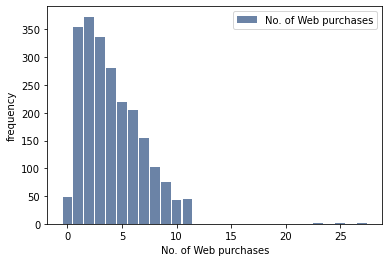

<Figure size 576x432 with 0 Axes>

In [6]:
hist = thinkstats2.Hist(cust_df.NumWebPurchases, label='No. of Web purchases')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='No. of Web purchases', ylabel='frequency')

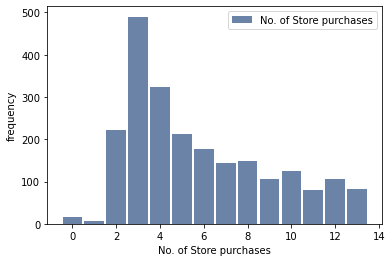

<Figure size 576x432 with 0 Axes>

In [7]:
hist = thinkstats2.Hist(cust_df.NumStorePurchases, label='No. of Store purchases')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='No. of Store purchases', ylabel='frequency')

Text(0, 0.5, 'frequency')

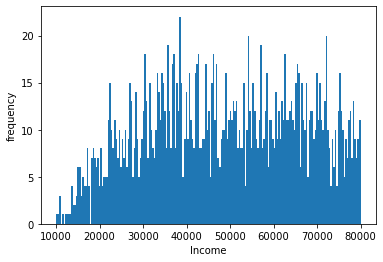

In [41]:
matplotlib.pyplot.hist(cust_df.Income, bins = 200, range = [10000,80000])
matplotlib.pyplot.xlabel("Income")
matplotlib.pyplot.ylabel("frequency")

Text(0, 0.5, 'frequency')

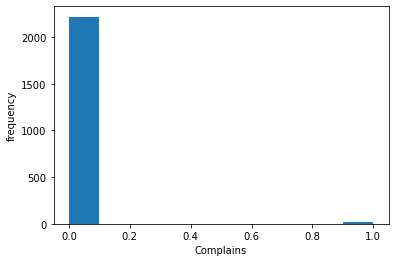

In [45]:
matplotlib.pyplot.hist(cust_df.Complain)
matplotlib.pyplot.xlabel("Complains")
matplotlib.pyplot.ylabel("frequency")

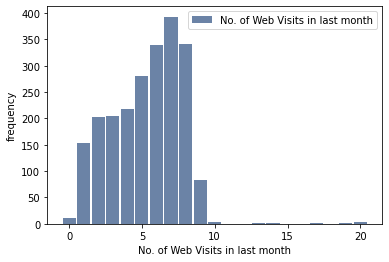

<Figure size 576x432 with 0 Axes>

In [90]:
hist = thinkstats2.Hist(cust_df.NumWebVisitsMonth, label='No. of Web Visits in last month')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='No. of Web Visits in last month', ylabel='frequency')

There are no outliers identified in above variables

### Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [105]:
#Mean, variance & standard deviation

mean = cust_df.NumWebPurchases.mean()
var = cust_df.NumWebPurchases.var()
std = cust_df.NumWebPurchases.std()
print("No. of Web purchases mean is:", mean)
print("No. of Web purchases variance is:", var)
print("No. of Web purchases standard deviation is:", std)

mean = cust_df.NumStorePurchases.mean()
var = cust_df.NumStorePurchases.var()
std = cust_df.NumStorePurchases.std()
print("\nNo. of Store purchases mean is:", mean)
print("No. of Store purchases variance is:", var)
print("No. of Store purchases standard deviation is:", std)

mean = cust_df.Income.mean()
var = cust_df.Income.var()
std = cust_df.Income.std()
print("\nIncome mean is:", mean)
print("Income variance is:", var)
print("Income standard deviation is:", std)

mean = cust_df.Complain.mean()
var = cust_df.Complain.var()
std = cust_df.Complain.std()
print("\nComplain mean is:", mean)
print("Complain variance is:", var)
print("Complain standard deviation is:", std)

mean = cust_df.NumWebVisitsMonth.mean()
var = cust_df.NumWebVisitsMonth.var()
std = cust_df.NumWebVisitsMonth.std()
print("\nNo. of Web Visits in last Month mean is:", mean)
print("No. of Web Visits in last Month variance is:", var)
print("No. of Web Visits in last Month standard deviation is:", std)


No. of Web purchases mean is: 4.084821428571429
No. of Web purchases variance is: 7.7212523128948245
No. of Web purchases standard deviation is: 2.7787141473881087

No. of Store purchases mean is: 5.790178571428571
No. of Store purchases variance is: 10.568728864926845
No. of Store purchases standard deviation is: 3.250958145674417

Income mean is: 52247.25135379061
Income variance is: 633683788.5756192
Income standard deviation is: 25173.07666090141

Complain mean is: 0.009375
Complain variance is: 0.009291257257704457
Complain standard deviation is: 0.0963911679444982

No. of Web Visits in last Month mean is: 5.316517857142857
No. of Web Visits in last Month variance is: 5.888606002360743
No. of Web Visits in last Month standard deviation is: 2.426645009547285


### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [13]:
# Splitting my data by customer who complained and not.
Cust_Complain = cust_df[cust_df.Complain == 1]
Cust_NoComplain = cust_df[cust_df.Complain != 1]

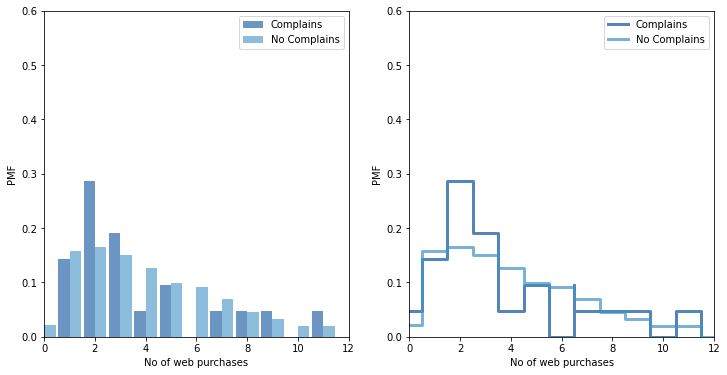

In [14]:
# getting pmf of no. of web purchases of customers who complained.
Cust_Complain_pmf = thinkstats2.Pmf(Cust_Complain.NumWebPurchases, label='Complains') 
# getting pmf of no. of web purchases of customers who have not complained.
Cust_NoComplain_pmf = thinkstats2.Pmf(Cust_NoComplain.NumWebPurchases, label='No Complains') 

width=0.45 # width of the bar
axis = [0, 12, 0, 0.6] # x-axis and y-axis scale
thinkplot.PrePlot(2, cols=2) # pre select colour for 2 PMFs
thinkplot.Hist(Cust_Complain_pmf, align='right', width=width) #plot
thinkplot.Hist(Cust_NoComplain_pmf, align='left', width=width) #plot
thinkplot.Config(xlabel='No of web purchases', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Cust_Complain_pmf, Cust_NoComplain_pmf]) # plot
thinkplot.Config(xlabel='No of web purchases', ylabel='PMF', axis=axis)


Here by looking at the above PMF plot we can say that within the customers with less No. of Web purchases, the Complains are more compared to the customers with more No. of Web Purchases.

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

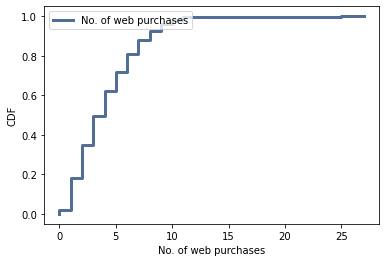

In [15]:
cdf = thinkstats2.Cdf(cust_df.NumWebPurchases, label='No. of web purchases') # get CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='No. of web purchases', ylabel='CDF', loc='upper left') #plot

From the above CDF plot of No. of web purchases, we can see only 10% of the population makes no purchases below 1 and above 12. Most of the population make the no. of web purchases between 1 to 10.

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

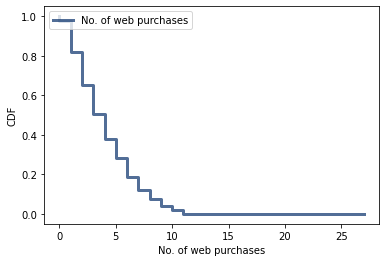

In [16]:
cdf = thinkstats2.Cdf(cust_df.NumWebPurchases, label='No. of web purchases') # get CDF
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='No. of web purchases', ylabel='CDF', loc='upper left') #plot

From the above plot of complementary CDF on a log-y scale we can see it is not a perfect stratight line. So we can say the exponential distribution model is not a perfect fit for No. of web purchases.

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

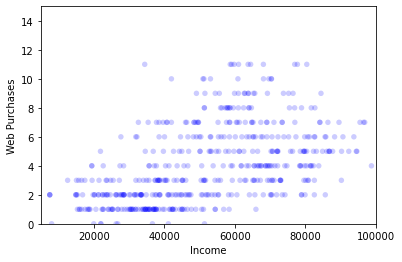

<Figure size 576x432 with 0 Axes>

In [19]:
sample = thinkstats2.SampleRows(cust_df, 500)
WebPurchases, Income = sample.NumWebPurchases, sample.Income
thinkplot.Scatter(Income, WebPurchases)
thinkplot.Show(xlabel='Income', ylabel='Web Purchases', axis=[5000, 100000, 0, 15])

In [55]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = xs.mean()
    if meany is None:
        meany = ys.mean()

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [58]:
Cov(sample.Income.notna(), sample.NumWebPurchases) # get covariance

0.012560000000000002

In [59]:
Corr(sample.Income.notna(), sample.NumWebPurchases) #get correlation

0.0399892725226043

From the corelation and covariance value we can see there is a positive correlation between Income of the customer and the Number of Web purchases. The more the income of the customer, the more they tend to purchase on web and vice versa.

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [60]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [70]:
for i in range (10):  # run a loop 20 times
    sample = thinkstats2.SampleRows(cust_df, 500) # select random 500 rows  
    data = sample.Income.notna(), sample.NumWebPurchases
    ht = CorrelationPermute(data)
    pvalue = ht.PValue()
    print("pvalue=", pvalue) # print the p-value

pvalue= 0.002
pvalue= 0.169
pvalue= 0.065
pvalue= 0.331
pvalue= 0.032
pvalue= 0.048
pvalue= 0.849
pvalue= 0.373
pvalue= 0.011
pvalue= 0.005


From the above correlation test, we got p-value < 0.05 most of the times. So we can say that Income's impact on Number of web purchases is statistically significant.

### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [74]:
formula = 'Complain ~ Income+NumWebPurchases+NumStorePurchases+NumWebVisitsMonth'
model = smf.ols(formula, data=cust_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Complain   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4653
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.761
Time:                        00:26:08   Log-Likelihood:                 2029.2
No. Observations:                2216   AIC:                            -4048.
Df Residuals:                    2211   BIC:                            -4020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0123      0.010      1.194      0.233      -0.008       0.032
Income            -7.467e-08   1.11e-07     -0.672      0.502   -2.93e-07    1.43e-07
NumWebPurchases      -0.0004      0.001     -0.377      0.706      -0.002       0.001
NumStorePurchases   8.03e-05      0.001      0.094      0.925      -0.002       0.002
NumWebVisitsMonth     0.0004      0.001      0.353      0.724      -0.002       0.003
==============================================================================
Omnibus:                     3467.187   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           967817.518
Skew:                          10.113   Prob(JB):                         0.00
Kurtosis:                     103.363   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""